# Affine Transformationen mit clesperanto
Dieses Notebook zeigt, wie man affine Transformationen auf 3D-Bilder anwendet.

In [1]:
import pyclesperanto_prototype as cle

cle.select_device('TX')

<NVIDIA GeForce GTX 1650 with Max-Q Design on Platform: NVIDIA CUDA (1 refs)>

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage.io import imread

In [3]:
# Beispieldaten laden
np_array = imread('../../data/Haase_MRT_tfl3d1.tif')
np_array.shape

(192, 256, 256)

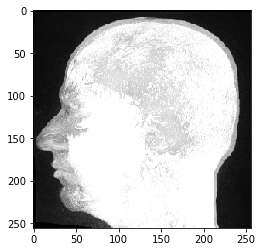

In [4]:
# in den GPU-Speicher übertragen
input_image = cle.push_zyx(np_array)

cle.imshow(input_image)

## Rotation
Um ein Bild zu rotieren, müssen Sie Winkel entsprechend den Achsen angeben.

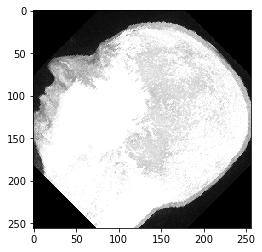

In [5]:
rotated = cle.rotate(input_image, angle_around_z_in_degrees=45)
cle.imshow(rotated)

Standardmäßig werden Bilder um ihren Mittelpunkt rotiert. Sie können dies ändern, indem Sie einen zusätzlichen Parameter angeben. Das Bild wird dann um den Ursprung rotiert.

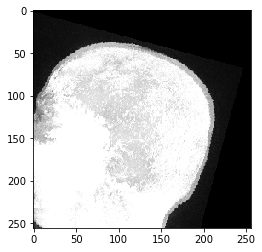

In [6]:
rotated = cle.rotate(input_image, angle_around_z_in_degrees=15, rotate_around_center=False)
cle.imshow(rotated)

## Translation
Bilder können verschoben werden, indem man Verschiebungsdistanzen entlang der Achsen angibt:

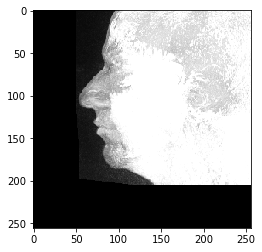

In [7]:
translated = cle.translate(input_image, translate_x=50, translate_y=-50)
cle.imshow(translated)

## Skalierung
Sie können das Bild skalieren, indem Sie Skalierungsfaktoren angeben.

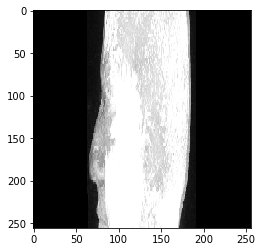

In [8]:
scaled = cle.scale(input_image, factor_x=0.5, factor_y=2)
cle.imshow(scaled)

In diesem Zusammenhang könnte der `auto_size` Parameter nützlich sein:

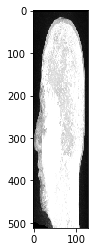

In [9]:
scaled_auto_size = cle.scale(input_image, factor_x=0.5, factor_y=2, auto_size=True)
cle.imshow(scaled_auto_size)

## Starre Transformation
Starre Transformationen ermöglichen es, Translationen und Rotationen in einem Schritt durchzuführen

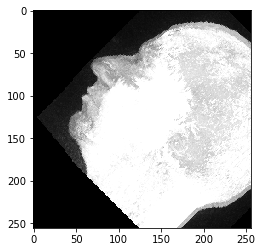

In [10]:
rigid_transformed = cle.rigid_transform(input_image, translate_x=50, angle_around_z_in_degrees=45)
cle.imshow(rigid_transformed)

## Affine Transformationen
Um Translation, Rotation, Skalierung und Scherung in einem Schritt durchzuführen, verwenden Sie affine Transformationen.

Um eine affine Transformation einzurichten, können Sie dies mit einer 4x4 Transformationsmatrix tun:

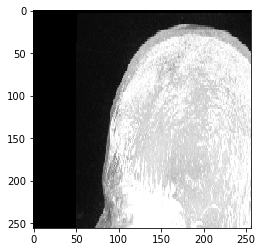

In [11]:
transform_matrix = np.asarray([
    [1, 0, 0, 50],
    [0, 2, 0, 0],
    [0, 0, 0.5, 0],
    [0, 0, 0, 1]
])
transformed_image = cle.affine_transform(input_image, transform=transform_matrix)
cle.imshow(transformed_image)

Alternativ können Sie ein Transform-Objekt konfigurieren und übergeben:

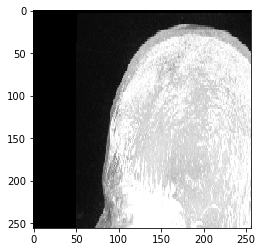

In [12]:
transform = cle.AffineTransform3D()
transform.translate(50)
transform.scale(1, 2, 0.5)

transformed_image = cle.affine_transform(input_image, transform=transform)
cle.imshow(transformed_image)

### Scherung
Durch Angabe des Scherungswinkels wird das Bild in der gewünschten Ebene geschert

Die Scherung wird mit dem Scherungswinkel nach folgender Gleichung berechnet:

1.0/ tan(shear_angle_in_degrees * pi / 180)


yz


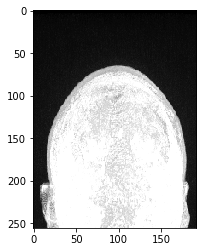

xz


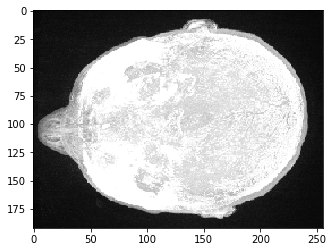

xy


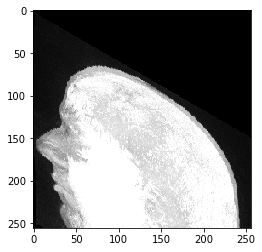

In [13]:
# Zum Beispiel, um das Bild in der Y-Achse entlang der YZ-Ebene mit einem Scherungswinkel von 30 Grad zu scheren

shear_angle = 30.0

transform = cle.AffineTransform3D()
shear_transform= transform.shear_in_z_plane(angle_y_in_degrees=shear_angle)

transformed_image = cle.affine_transform(input_image, transform=shear_transform)

## Bilder in jeder Ebene anzeigen
print("yz")
cle.imshow(cle.maximum_x_projection(transformed_image))
print("xz")
cle.imshow(cle.maximum_y_projection(transformed_image))
print("xy")
cle.imshow(cle.maximum_z_projection(transformed_image))

# Lineare Interpolation versus Nächste-Nachbarn-Interpolation
Lassen Sie uns die Nase ausschneiden und mit verschiedenen Interpolationsmodi transformieren.

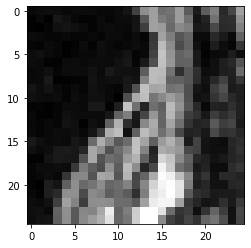

In [14]:
crop = input_image[50,125:150,45:70]

cle.imshow(crop)

# Nächste-Nachbarn-Interpolation

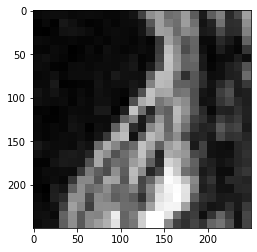

In [15]:
# ein größeres Bild erstellen
rescaled = cle.create(np.asarray(crop.shape) * 10)

# es mit einer skalierten Version des Bildes füllen; 
cle.scale(crop, rescaled, factor_x=10, factor_y=10, factor_z=10, linear_interpolation=False)
cle.imshow(rescaled)

### Lineare Interpolation

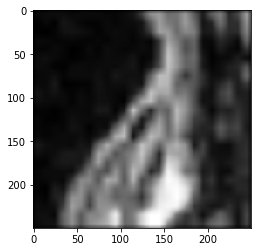

In [16]:
# es mit einer skalierten Version des Bildes füllen; 
cle.scale(crop, rescaled, factor_x=10, factor_y=10, factor_z=10, linear_interpolation=True)
cle.imshow(rescaled)